# Experiment and path specification

In [1]:
# Specify the experiment for analysis
experiment='cxic00318'
runNumber = 200

# Set the installation and output path
import os
os.environ['INSTALLPATH']= '/cds/home/i/igabalsk/TRXS-Run18'
os.environ['OUTPUTPATH']= '/cds/data/psdm/%s/%s/scratch' % (experiment[0:3],experiment)

# Import Libraries

In [2]:
# Magic iPython command to enable plotting
%matplotlib inline

# Load in the pythonBatchMagic library
import sys
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/pythonBatchMagic')
from pythonBatchMagic import *

# Determine current user
currentUser, error = unixCMD("echo $USER")
currentUser = currentUser.strip()
print(currentUser)
os.environ['RESULTSPATH']= ('/cds/data/psdm/%s/%s/results/%s' % (experiment[0:3],experiment,currentUser)).strip()
if not os.path.exists(os.environ['RESULTSPATH']):
    os.mkdir(os.environ['RESULTSPATH'])

Current user is igabalsk will output batch to /cds/data/psdm/cxi/cxic00318/scratch/igabalsk/Batch
igabalsk


# Leveraging the batch queue to quickly grab point data

## Loading libraries

In [3]:
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/LCLS')
from LCLSdefault import *

sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/mattsLibraries')
from picklez import *

# Load in the get data library
from dataAnalysis import *

# Load in the batch library for lcls
from lclsBatch import *

IOError: Did you load the correct file? /cds/data/psdm/cxi/cxic00318/scratch/Memories/getCSPADcoords
Current user is igabalsk will output batch to /cds/data/psdm/cxi/cxic00318/scratch/igabalsk/Batch


## Grabbing point data across nodes

In [4]:

detDict = {'ebeamcharge':{'name':'EBeam', 'get-function': 'getEbeamCharge'}}


batchThreads = batchPointDataGrabber( detDict, eventMax=1e5, experiment=experiment, runNumber=runNumber, rank=1 )
batchThreads.Queue = 'psanaq'
batchThreads.start()

Deleting the old output file ...
Output: 
Error: None
Submitting: ssh psana 'bsub -n 1 -R "rusage[mem=1000]" -q psanaq -o /cds/data/psdm/cxi/cxic00318/scratch/igabalsk/Batch/Output/pointData-run200-temp0.out /cds/home/i/igabalsk/TRXS-Run18/Libraries/pythonBatchMagic/BatchWrapper.sh mpirun python2 /cds/data/psdm/cxi/cxic00318/scratch/igabalsk/Batch/Python/pointData-run200-temp0.py'
Output: Job <641389> is submitted to queue <psanaq>.

Error: 
IOError: Did you load the correct file? /cds/data/psdm/cxi/cxic00318/scratch/igabalsk/Batch/Output/nodePointDataGrabber0-run-200


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/cds/home/i/igabalsk/TRXS-Run18/Libraries/pythonBatchMagic/lclsBatch.py", line 220, in run
    self.gather()
  File "/cds/home/i/igabalsk/TRXS-Run18/Libraries/pythonBatchMagic/lclsBatch.py", line 263, in gather
    self.detArrays = load_obj( BATCHDIR + '/Output/nodePointDataGrabber%d-run-%d' % (0,self.runNumber) )
  File "/cds/home/i/igabalsk/TRXS-Run18/Libraries/LCLS/dataAnalysis.py", line 57, in load_obj
    raise e
IOError: [Errno 2] No such file or directory: '/cds/data/psdm/cxi/cxic00318/scratch/igabalsk/Batch/Output/nodePointDataGrabber0-run-200.pkl'



## Check job status

In [12]:
stdoutdata, stderrdata = bjobs()
print stdoutdata
print stderrdata


No unfinished job found



## Kill threads if they die

In [13]:
batchThreads.requestStop()
time.sleep(5)
bkill(killAll=True)

('', 'No unfinished job found\n')

In [13]:
batchThreads.status

'Gathering'

In [14]:
batchThreads.gather()

IOError: Did you load the correct file? /cds/data/psdm/cxi/cxic00318/scratch/igabalsk/Batch/Output/nodePointDataGrabber0-run-200


IOError: [Errno 2] No such file or directory: '/cds/data/psdm/cxi/cxic00318/scratch/igabalsk/Batch/Output/nodePointDataGrabber0-run-200.pkl'

## Drop empty array values

In [14]:
pointData = batchThreads.detArrays
print pointData

def dropEmpty(pointData):

    filledBin = (pointData['seconds'] > 0)

    for key in pointData.keys():
        pointData[key]=pointData[key][filledBin] 
        
    return pointData

pointData = dropEmpty(pointData)


None


TypeError: 'NoneType' object has no attribute '__getitem__'

## Save point data

In [15]:
save_obj( pointData, os.environ['RESULTSPATH']+'/pointData-run-%d' % runNumber )

## Plot histogram of result

TypeError: 'NoneType' object has no attribute '__getitem__'

/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


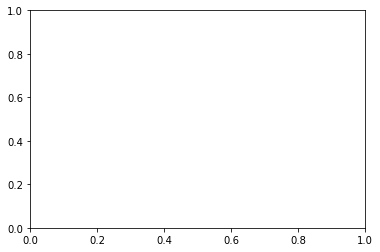

In [16]:
detArrays = pointData

fig2, ax2 = plt.subplots(1, 1)
ax2.hist(detArrays['ebeamcharge'], bins=100,normed=False, alpha=0.5);